In [1]:
import cv2
import PIL
import pytesseract
import matplotlib.pyplot as plt

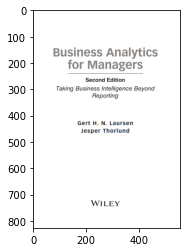

In [2]:
path=r"C:\Users\AKASH J\Desktop\Orgware\samp.png"
img=cv2.imread(path)
plt.imshow(img)

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

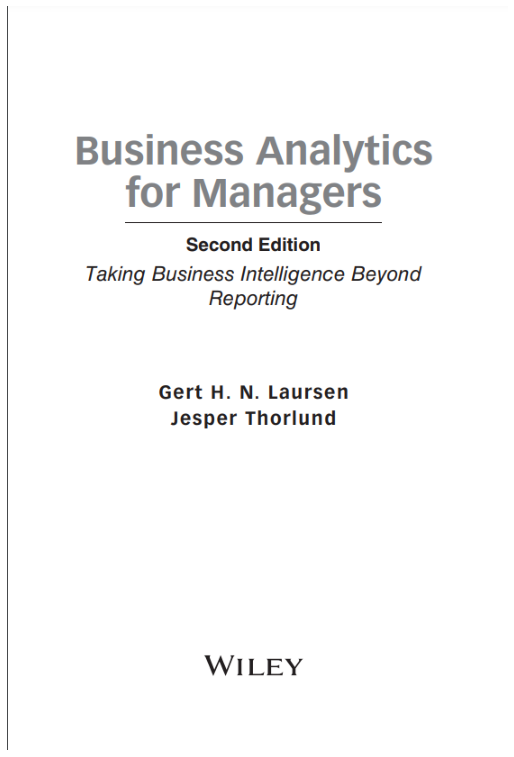

In [4]:
display(path)

In [5]:
image=cv2.bitwise_not(img)

In [6]:
inv_path=r"C:\Users\AKASH J\Desktop\Orgware\temp\invert.jpg"
cv2.imwrite(inv_path,image)

True

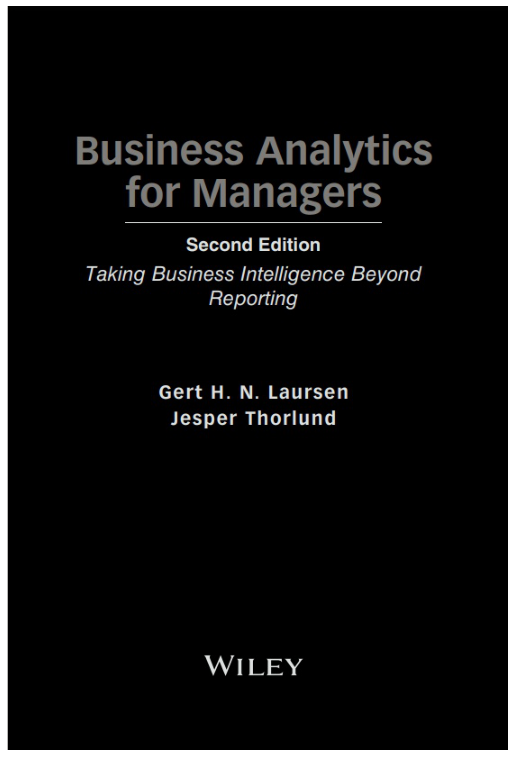

In [7]:
display(inv_path)

In [24]:
def grayscale(image):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gs=grayscale(img)

In [25]:
gs_path=r"C:\Users\AKASH J\Desktop\Orgware\temp\gray.jpg"
cv2.imwrite(gs_path,image)

True

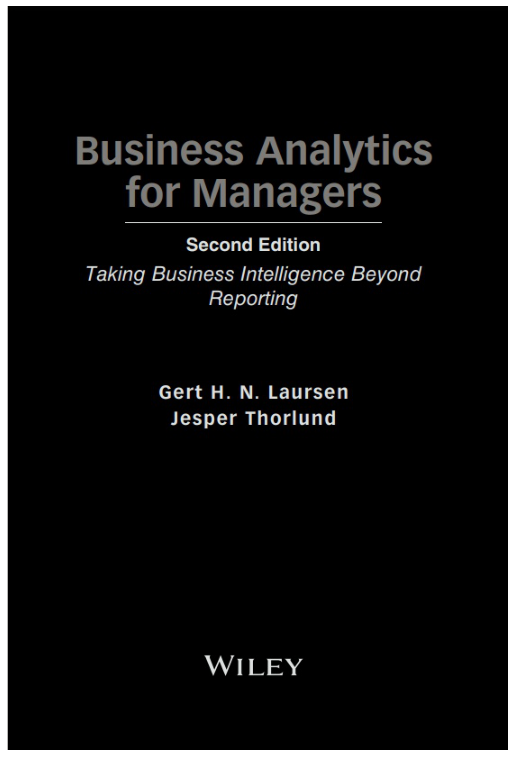

In [26]:
display(gs_path)

In [51]:
thresh,im_bw =cv2.threshold(gs,190,380,cv2.THRESH_BINARY)
bin_path=r"C:\Users\AKASH J\Desktop\Orgware\temp\binarized.jpg"
cv2.imwrite(bin_path,im_bw)

True

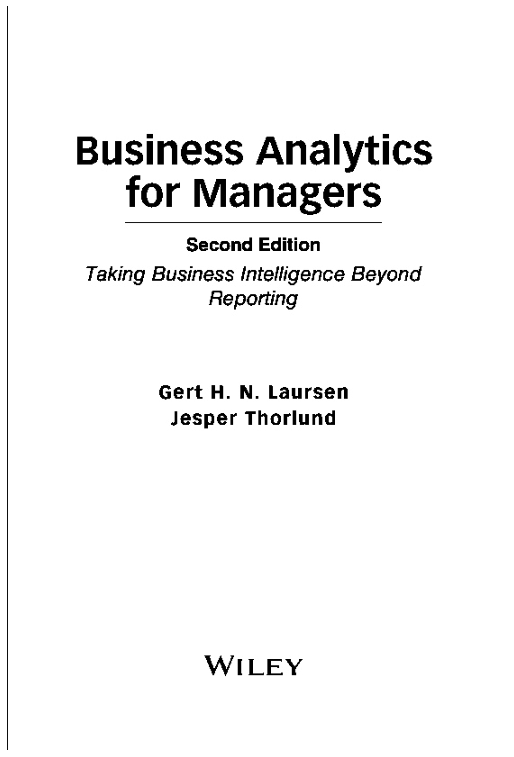

In [52]:
display(bin_path)

In [59]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=2)
    image = cv2.bitwise_not(image)
    return (image)

In [60]:
eroded_image = thin_font(im_bw)
erode_path=r"C:\Users\AKASH J\Desktop\Orgware\thin_font.jpg"
cv2.imwrite(erode_path,eroded_image)

True

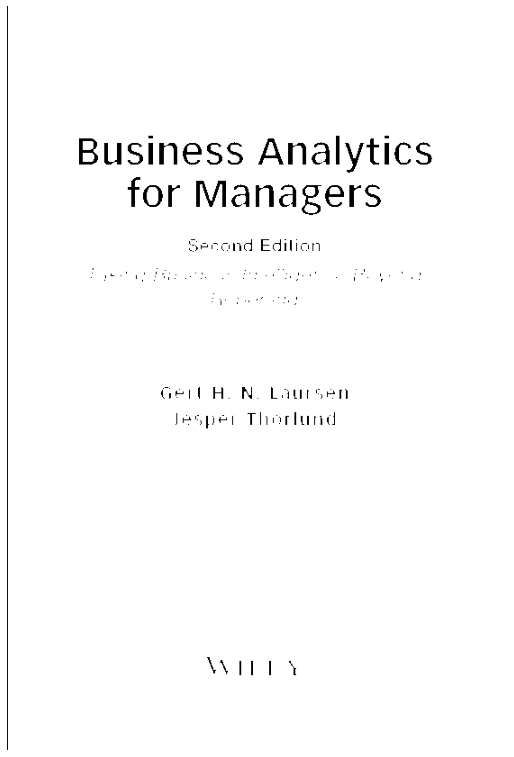

In [61]:
display(erode_path)

In [70]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=2)
    image = cv2.bitwise_not(image)
    return (image)

In [71]:
dilated_image = thick_font(im_bw)
dil_path=r"C:\Users\AKASH J\Desktop\Orgware\thick_font.jpg"
cv2.imwrite(dil_path,dilated_image)

True

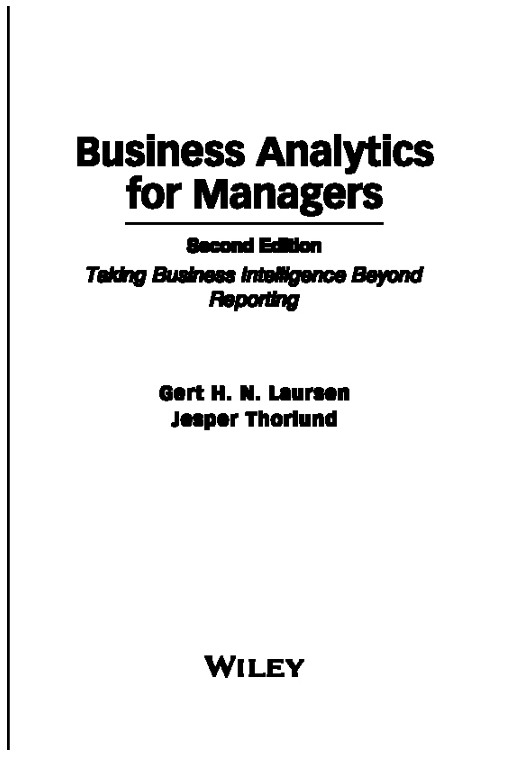

In [72]:
display(dil_path)

In [ ]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)
     # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [ ]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [ ]:
fixed = deskew(new)

In [6]:
import pytesseract
ocr_result=pytesseract.image_to_string(img)
print(ocr_result)

Business Analytics
for Managers
Second Edition

Taking Business Intelligence Beyond
Reporting

Gert H. N. Laursen
Jesper Thorlund

WILEY



In [4]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [5]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"